In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [39]:
data = pd.read_csv('D:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\ecoli\ecoli.csv')
data

,mcg,gvh,lip,chg,aac,alm1,alm2,label
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     336 non-null    float64
 1   gvh     336 non-null    float64
 2   lip     336 non-null    float64
 3   chg     336 non-null    float64
 4   aac     336 non-null    float64
 5   alm1    336 non-null    float64
 6   alm2    336 non-null    float64
 7   label   336 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB


In [4]:
data.describe()

,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [5]:
data['label'].value_counts()

label
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: count, dtype: int64

## VISUALISASI DATA 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


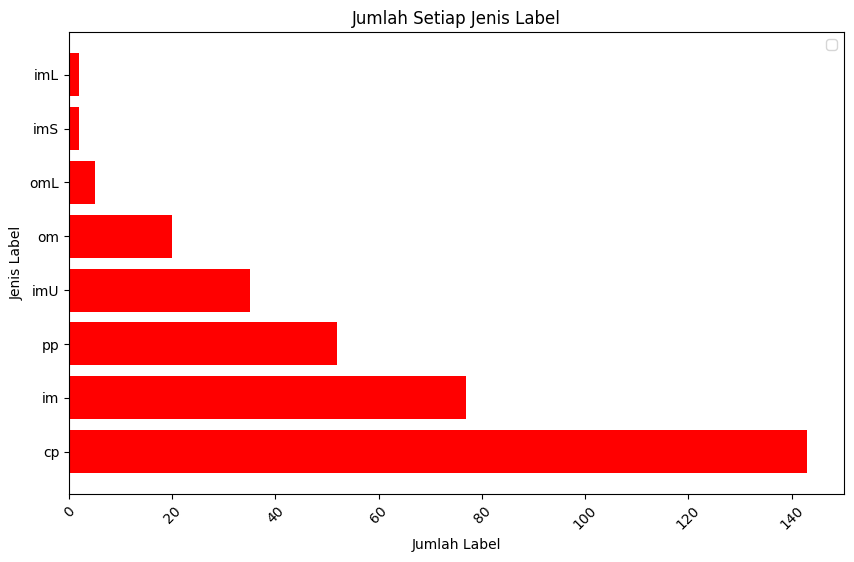

In [6]:
# Hitung jumlah setiap jenis label
label_counts = data['label'].value_counts()

# Buat plot batang
plt.figure(figsize=(10, 6))
plt.barh(label_counts.index, label_counts.values, color='r')
plt.xlabel('Jumlah Label')
plt.ylabel('Jenis Label')
plt.title('Jumlah Setiap Jenis Label')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## PROSES PEMODELAN

# Pemodelan dengan komposisi 80:20

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x = data.iloc[:,0:7]
y = data['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=10 )

Mencari Tahu Apakah Data Testing Tidak Seimbang Komposisinya

In [64]:
y_train.value_counts()

label
cp     115
im      61
pp      40
imU     28
om      16
omL      4
imL      2
imS      2
Name: count, dtype: int64

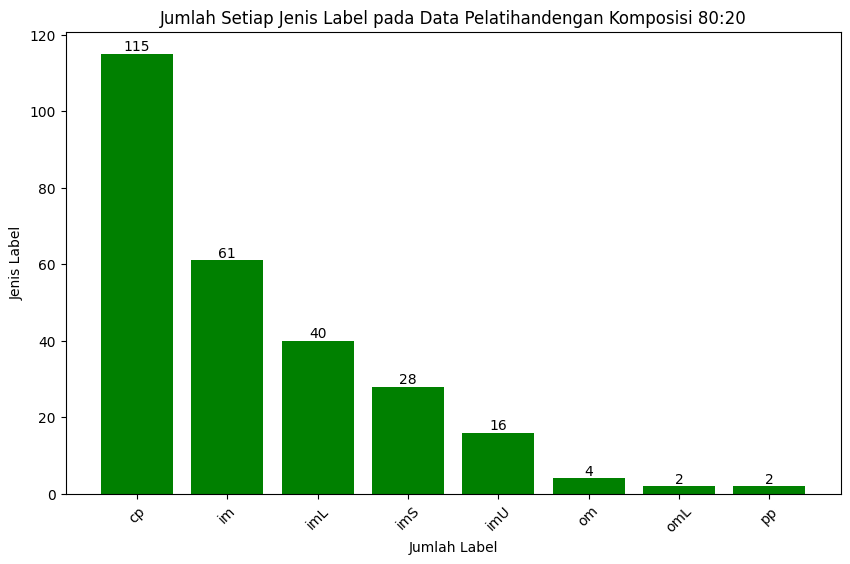

In [105]:
# Hitung jumlah setiap jenis label
label_count = y_train.value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(np.unique(y_train),label_count.values, color='g')

# Menambahkan teks di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom')

plt.xlabel('Jumlah Label')
plt.ylabel('Jenis Label')
plt.title('Jumlah Setiap Jenis Label pada Data Pelatihandengan Komposisi 80:20')
plt.xticks(rotation=45)
plt.show()

# Komposisi Train dan Testing 70:30

In [73]:
x1 = data.iloc[:,0:7]
y1 = data['label']
x_train70, x_test70, y_train70, y_test70 = train_test_split(x1, y1, test_size= 0.3, random_state=10)

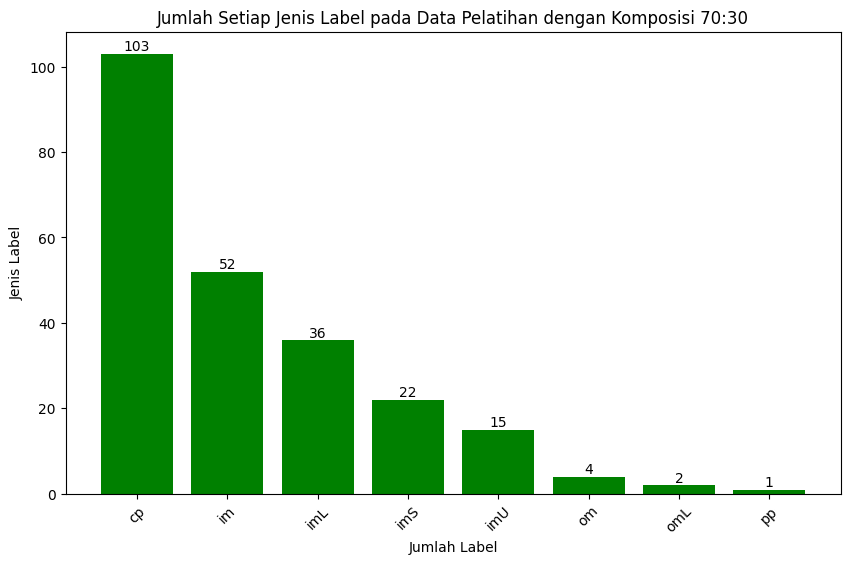

In [104]:
# Hitung jumlah setiap jenis label
label_counts70 = y_train70.value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(np.unique(y_train70),label_counts70.values, color='g')

# Menambahkan teks di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom')

plt.xlabel('Jumlah Label')
plt.ylabel('Jenis Label')
plt.title('Jumlah Setiap Jenis Label pada Data Pelatihan dengan Komposisi 70:30')
plt.xticks(rotation=45)
plt.show()

# Splitting Data Training dan Testing 60:40

In [84]:
x2 = data.iloc[:,0:7]
y2 = data['label']
x_train60, x_test60, y_train60, y_test60 = train_test_split(x2, y2, test_size= 0.4, random_state=10)

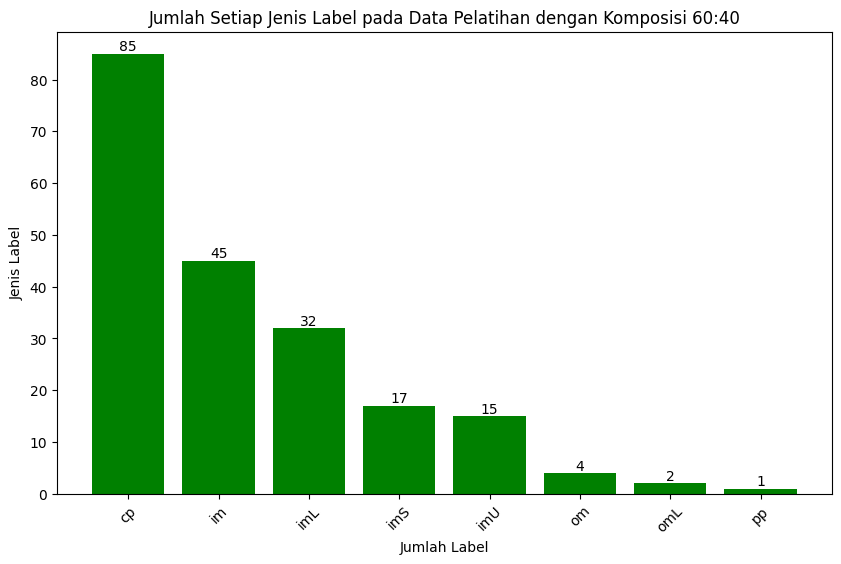

In [101]:
# Hitung jumlah setiap jenis label
label_counts60 = y_train60.value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(np.unique(y_train60),label_counts60.values, color='g')

# Menambahkan teks di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom')

plt.xlabel('Jumlah Label')
plt.ylabel('Jenis Label')
plt.title('Jumlah Setiap Jenis Label pada Data Pelatihan dengan Komposisi 60:40')
plt.xticks(rotation=45)
plt.show()

# Splitting Data Training dan Testing 50:50

In [95]:
x3 = data.iloc[:,0:7]
y3 = data['label']
x_train50, x_test50, y_train50, y_test50 = train_test_split(x3, y3, test_size= 0.4, random_state=10)

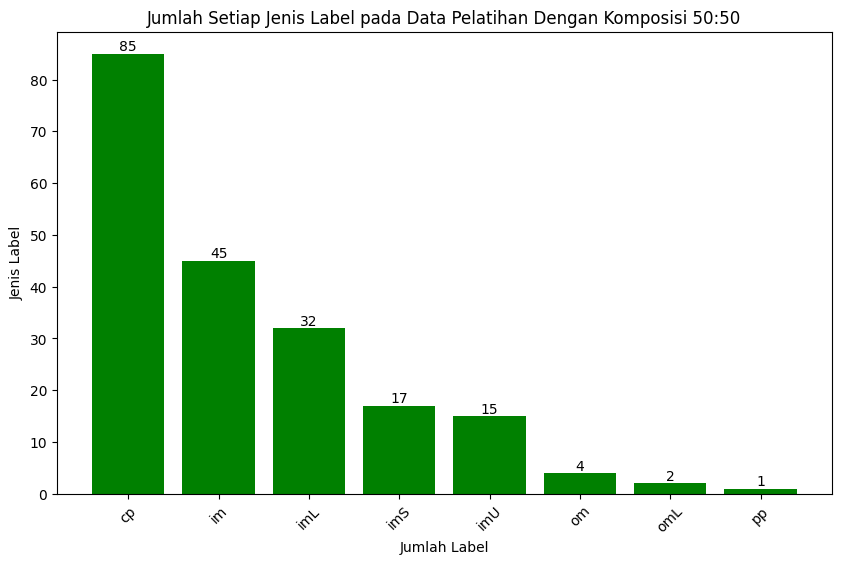

In [102]:
# Hitung jumlah setiap jenis label
label_counts50 = y_train50.value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(np.unique(y_train50),label_counts50.values, color='g')

# Menambahkan teks di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom')

plt.xlabel('Jumlah Label')
plt.ylabel('Jenis Label')
plt.title('Jumlah Setiap Jenis Label pada Data Pelatihan Dengan Komposisi 50:50')
plt.xticks(rotation=45)
plt.show()

Berdasarkan hasil splitting data diatas, bisa dilihat pada barplot diatas bisa disimpulkan bahwasannya data training sudah bisa dikatakan not balance (tidak seimbang) karena komposisi setiap label data yang diambil menjadi data training jumlahnya tidak sama banyak. Hal ini bisa disebabkan karena jumlah data awal sebenarnya tidak banyak jumlahnya ataupun bisa disebabkan oleh random_state(samplingnya).

Disini terdapat dua kemungkinan yang bisa dilakukan, mungkin bisa dicoba terlebih dahulu tanpa menggunakan teknik mengatasi oversampling ataupun undersampling. Jika akurasi dan matrix akurasinya dikira sudah paling tinggi maka teknik mengatasi data tidak seimbang sekiranya tidak perlu dilakukan. Namun jika setelah dilakukan percobaan tanpa oversampling atau undersampling ternyata tidak menghasilkan akurasi dan matrix akurasi yang tidak memuaskan maka bisa dilakukan oversampling maupun undersampling

## Pemodelan Tanpa Menghandle Imbalance Data

In [66]:
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Pemodelan dengan data Komposisi 80:20 

C:\Users\-MSI-\AppData\Local\Temp\ipykernel_16192\1347996763.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=accuracies.keys(), y=accuracies.values(), palette='tab20')# Gunakan 'viridis' colormap


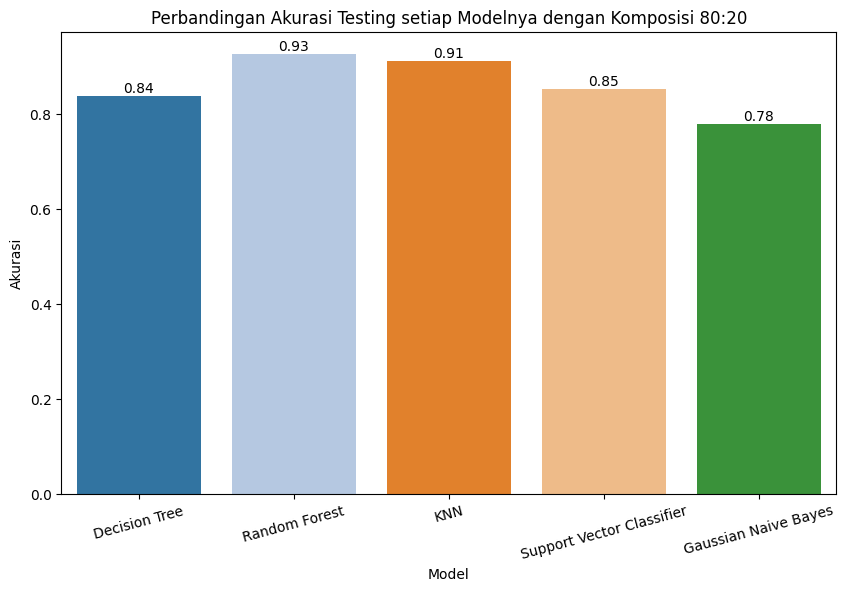

In [116]:
# Inisialisasi model
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier' : SVC(kernel='linear',probability=True),
    'Gaussian Naive Bayes' : GaussianNB()
}

# Pelatihan dan evaluasi model
accuracies = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    
# Membuat barplot dengan menggunakan colormap
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=accuracies.keys(), y=accuracies.values(), palette='tab20')# Gunakan 'viridis' colormap
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Testing setiap Modelnya dengan Komposisi 80:20')
plt.xticks(rotation=15)
# Menambahkan teks di atas setiap bar
for bar, accuracy in zip(bars.patches, accuracies.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}', 
             ha='center', va='bottom')
plt.show()

# Pemodelan dengan komposisi 70:30 

C:\Users\-MSI-\AppData\Local\Temp\ipykernel_16192\3625691920.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=accuracies70.keys(), y=accuracies70.values(), palette='tab20')# Gunakan 'viridis' colormap


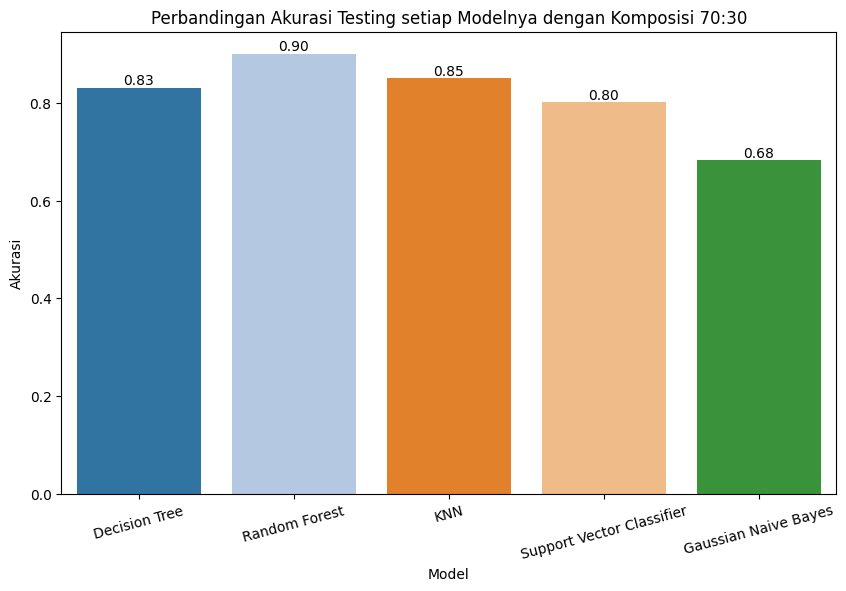

In [106]:
# Inisialisasi model
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier' : SVC(kernel='linear',probability=True),
    'Gaussian Naive Bayes' : GaussianNB()
}

# Pelatihan dan evaluasi model
accuracies70 = {}
for name, model in models.items():
    model.fit(x_train70, y_train70)
    y_pred70 = model.predict(x_test70)
    accuracy = accuracy_score(y_test70, y_pred70)
    accuracies70[name] = accuracy
    
# Membuat barplot dengan menggunakan colormap
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=accuracies70.keys(), y=accuracies70.values(), palette='tab20')# Gunakan 'viridis' colormap
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Testing setiap Modelnya dengan Komposisi 70:30')
plt.xticks(rotation=15)
# Menambahkan teks di atas setiap bar
for bar, accuracy in zip(bars.patches, accuracies70.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}', 
             ha='center', va='bottom')
plt.show()

# Pemodelan dengan Komposisi 60:40

C:\Users\-MSI-\AppData\Local\Temp\ipykernel_16192\3383899345.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=accuracies60.keys(), y=accuracies60.values(), palette='tab20')# Gunakan 'viridis' colormap


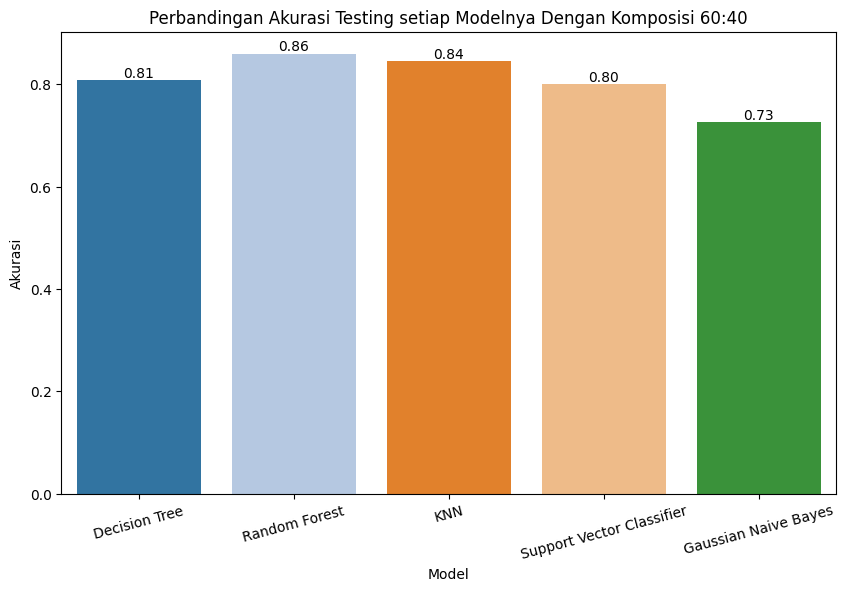

In [107]:
# Inisialisasi model
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier' : SVC(kernel='linear',probability=True),
    'Gaussian Naive Bayes' : GaussianNB()
}

# Pelatihan dan evaluasi model
accuracies60 = {}
for name, model in models.items():
    model.fit(x_train60, y_train60)
    y_pred60 = model.predict(x_test60)
    accuracy = accuracy_score(y_test60, y_pred60)
    accuracies60[name] = accuracy
    
# Membuat barplot dengan menggunakan colormap
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=accuracies60.keys(), y=accuracies60.values(), palette='tab20')# Gunakan 'viridis' colormap
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Testing setiap Modelnya Dengan Komposisi 60:40')
plt.xticks(rotation=15)
# Menambahkan teks di atas setiap bar
for bar, accuracy in zip(bars.patches, accuracies60.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}', 
             ha='center', va='bottom')
plt.show()

# Pemodelan dengan Komposisi 50:50

C:\Users\-MSI-\AppData\Local\Temp\ipykernel_16192\859825766.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=accuracies50.keys(), y=accuracies50.values(), palette='tab20')# Gunakan 'viridis' colormap


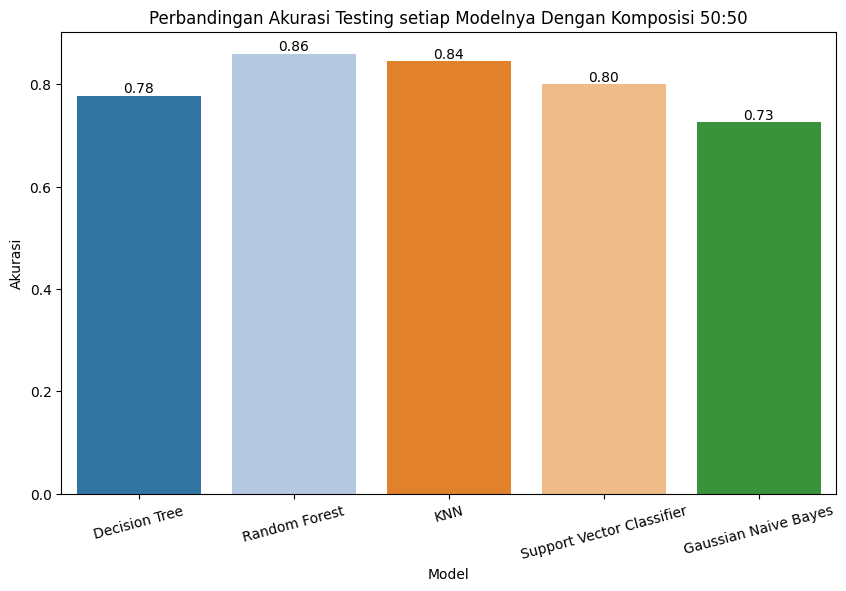

In [108]:
# Inisialisasi model
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier' : SVC(kernel='linear',probability=True),
    'Gaussian Naive Bayes' : GaussianNB()
}

# Pelatihan dan evaluasi model
accuracies50 = {}
for name, model in models.items():
    model.fit(x_train50, y_train50)
    y_pred50 = model.predict(x_test50)
    accuracy = accuracy_score(y_test50, y_pred50)
    accuracies50[name] = accuracy
    
# Membuat barplot dengan menggunakan colormap
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=accuracies50.keys(), y=accuracies50.values(), palette='tab20')# Gunakan 'viridis' colormap
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Testing setiap Modelnya Dengan Komposisi 50:50')
plt.xticks(rotation=15)
# Menambahkan teks di atas setiap bar
for bar, accuracy in zip(bars.patches, accuracies50.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}', 
             ha='center', va='bottom')
plt.show()

# Visualisasi Hasil Akurasi Setiap Model Tanpa Handle imbalance Data

Dengan Komposisi 80:20

In [118]:
# Data contoh
# Inisialisasi model
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier' : SVC(kernel='linear',probability=True),
    'Gaussian Naive Bayes' : GaussianNB()
}

# Pelatihan dan evaluasi model
akurasi_test = {}
akurasi_train = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    y_pred = model.predict(x_test)
    akurasi = accuracy_score(y_train, y_pred_t)
    accuracy = accuracy_score(y_test, y_pred)
    akurasi_test[name] = accuracy
    akurasi_train[name] = akurasi

# Data contoh
models = list(models.keys())
train_accuracy = list(akurasi_train.values())
test_accuracy = list(akurasi_test.values())

# Membuat dataframe dari data
data = pd.DataFrame({'Model': models * 2, 'Accuracy': train_accuracy + test_accuracy,
                     'Dataset': ['Training'] * len(models) + ['Testing'] * len(models)})

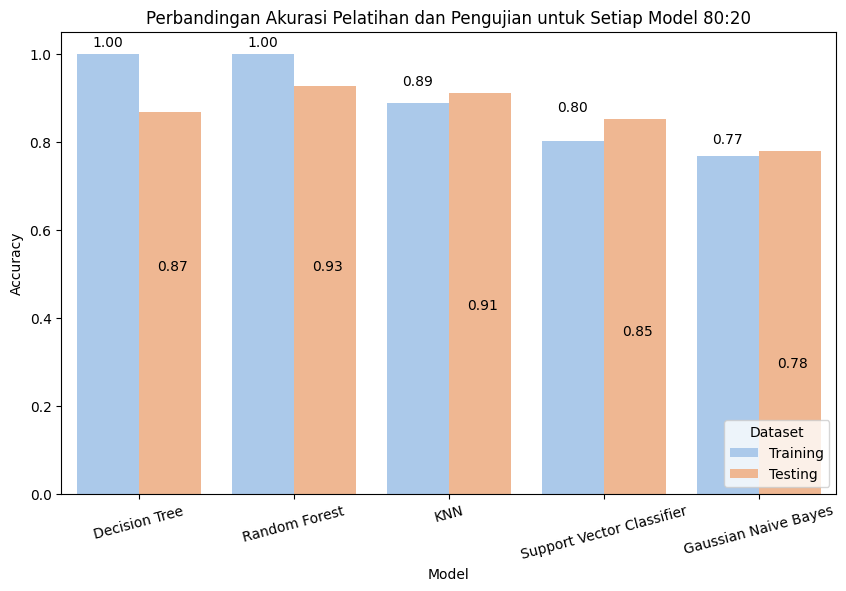

In [119]:
# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=data, palette='pastel')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Pelatihan dan Pengujian untuk Setiap Model 80:20')
plt.xticks(rotation=15)
plt.legend(title='Dataset', loc='lower right')
# Menambahkan teks di atas setiap bar dengan sedikit offset vertikal
for bar, accuracy_train, accuracy_test in zip(bars.patches[:len(models)], train_accuracy, test_accuracy):
    height = max(accuracy_train, accuracy_test)
    plt.text(bar.get_x() + bar.get_width() - 0.6, height + 0.01, f'{accuracy_train:.2f}', 
             ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() - 0.18, height - 0.5, f'{accuracy_test:.2f}', 
             ha='center', va='bottom')
plt.show()

Dengan Komposisi 70:30

In [120]:
# Inisialisasi model
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier' : SVC(kernel='linear',probability=True),
    'Gaussian Naive Bayes' : GaussianNB()
}

# Pelatihan dan evaluasi model
akurasi_test70 = {}
akurasi_train70 = {}

for name, model in models.items():
    model.fit(x_train70, y_train70)
    y_pred_t70 = model.predict(x_train70)
    y_pred70 = model.predict(x_test70)
    akurasi70 = accuracy_score(y_train70, y_pred_t70)
    accuracy70 = accuracy_score(y_test70, y_pred70)
    akurasi_test70[name] = accuracy70
    akurasi_train70[name] = akurasi70

# Data contoh
models = list(models.keys())
train_accuracy70 = list(akurasi_train70.values())
test_accuracy70 = list(akurasi_test70.values())

# Membuat dataframe dari data
data = pd.DataFrame({'Model': models * 2, 'Accuracy': train_accuracy70 + test_accuracy70,
                     'Dataset': ['Training'] * len(models) + ['Testing'] * len(models)})

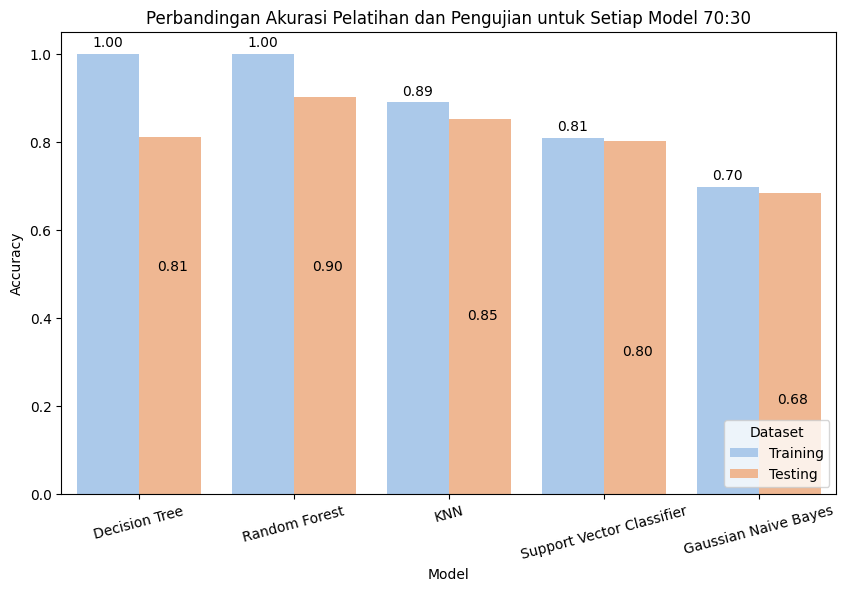

In [122]:
# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=data, palette='pastel')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Pelatihan dan Pengujian untuk Setiap Model 70:30')
plt.xticks(rotation=15)
plt.legend(title='Dataset', loc='lower right')
# Menambahkan teks di atas setiap bar dengan sedikit offset vertikal
for bar, accuracy_train, accuracy_test in zip(bars.patches[:len(models)], train_accuracy70, test_accuracy70):
    height = max(accuracy_train, accuracy_test)
    plt.text(bar.get_x() + bar.get_width() - 0.6, height + 0.01, f'{accuracy_train:.2f}', 
             ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() - 0.18, height - 0.5, f'{accuracy_test:.2f}', 
             ha='center', va='bottom')
plt.show()

Dengan Komposisi 60:40

In [123]:
# Inisialisasi model
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier' : SVC(kernel='linear',probability=True),
    'Gaussian Naive Bayes' : GaussianNB()
}

# Pelatihan dan evaluasi model
akurasi_test60 = {}
akurasi_train60 = {}

for name, model in models.items():
    model.fit(x_train60, y_train60)
    y_pred_t60 = model.predict(x_train60)
    y_pred60 = model.predict(x_test60)
    akurasi60 = accuracy_score(y_train60, y_pred_t60)
    accuracy60 = accuracy_score(y_test60, y_pred60)
    akurasi_test60[name] = accuracy60
    akurasi_train60[name] = akurasi60

# Data contoh
models = list(models.keys())
train_accuracy60 = list(akurasi_train60.values())
test_accuracy60 = list(akurasi_test60.values())

# Membuat dataframe dari data
data = pd.DataFrame({'Model': models * 2, 'Accuracy': train_accuracy60 + test_accuracy60,
                     'Dataset': ['Training'] * len(models) + ['Testing'] * len(models)})

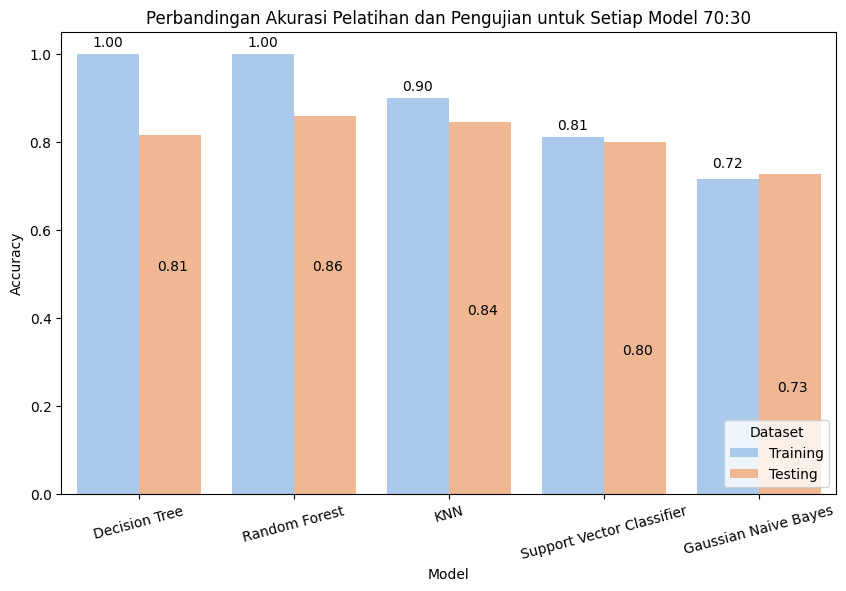

In [124]:
# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=data, palette='pastel')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Pelatihan dan Pengujian untuk Setiap Model 70:30')
plt.xticks(rotation=15)
plt.legend(title='Dataset', loc='lower right')
# Menambahkan teks di atas setiap bar dengan sedikit offset vertikal
for bar, accuracy_train, accuracy_test in zip(bars.patches[:len(models)], train_accuracy60, test_accuracy60):
    height = max(accuracy_train, accuracy_test)
    plt.text(bar.get_x() + bar.get_width() - 0.6, height + 0.01, f'{accuracy_train:.2f}', 
             ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() - 0.18, height - 0.5, f'{accuracy_test:.2f}', 
             ha='center', va='bottom')
plt.show()

Dengan Komposisi 50:50

In [125]:
# Inisialisasi model
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier' : SVC(kernel='linear',probability=True),
    'Gaussian Naive Bayes' : GaussianNB()
}

# Pelatihan dan evaluasi model
akurasi_test50 = {}
akurasi_train50 = {}

for name, model in models.items():
    model.fit(x_train50, y_train50)
    y_pred_t50 = model.predict(x_train50)
    y_pred50 = model.predict(x_test50)
    akurasi50 = accuracy_score(y_train50, y_pred_t50)
    accuracy50 = accuracy_score(y_test50, y_pred50)
    akurasi_test50[name] = accuracy50
    akurasi_train50[name] = akurasi50

# Data contoh
models = list(models.keys())
train_accuracy50 = list(akurasi_train50.values())
test_accuracy50 = list(akurasi_test50.values())

# Membuat dataframe dari data
data = pd.DataFrame({'Model': models * 2, 'Accuracy': train_accuracy50 + test_accuracy50,
                     'Dataset': ['Training'] * len(models) + ['Testing'] * len(models)})

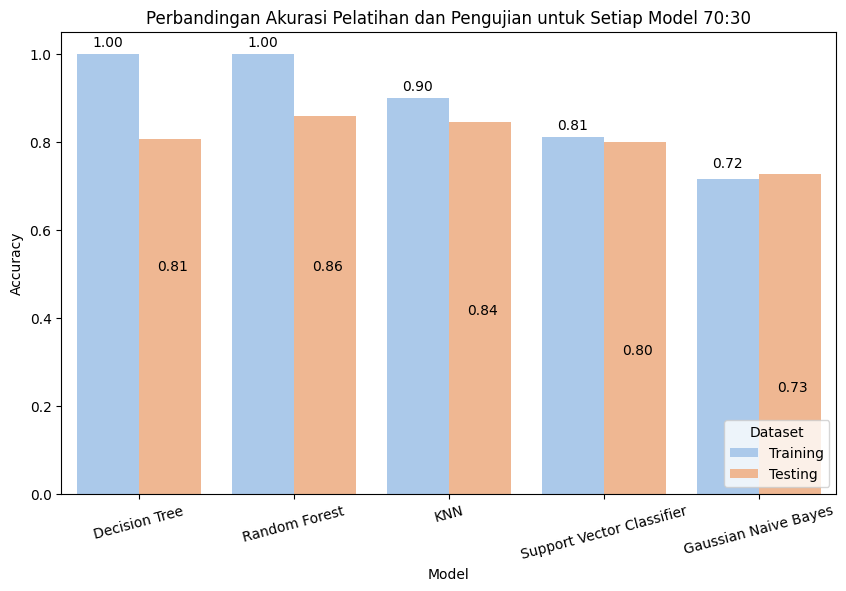

In [126]:
# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=data, palette='pastel')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Pelatihan dan Pengujian untuk Setiap Model 70:30')
plt.xticks(rotation=15)
plt.legend(title='Dataset', loc='lower right')
# Menambahkan teks di atas setiap bar dengan sedikit offset vertikal
for bar, accuracy_train, accuracy_test in zip(bars.patches[:len(models)], train_accuracy50, test_accuracy50):
    height = max(accuracy_train, accuracy_test)
    plt.text(bar.get_x() + bar.get_width() - 0.6, height + 0.01, f'{accuracy_train:.2f}', 
             ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() - 0.18, height - 0.5, f'{accuracy_test:.2f}', 
             ha='center', va='bottom')
plt.show()

# Mencoba Performa Model yang Sudah terbentuk Menggunakan Cross Validation apakah model sudah stabil dalam mengenali data data yang dimilikinya

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier': SVC(kernel='linear', probability=True),
    'Gaussian Naive Bayes': GaussianNB()
}

# Perform cross-validation
cv_results = {}
num_folds = 5
for name, model in models.items():
    cv_scores = cross_val_score(model, x, y, cv=num_folds)
    cv_results[name] = cv_scores


d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
d:\Developments\SMT 4\Ensamble Learning\Stacking Classifier\

Decision Tree: Mean Accuracy = 0.80, Std Dev = 0.02
Random Forest: Mean Accuracy = 0.86, Std Dev = 0.04
KNN: Mean Accuracy = 0.84, Std Dev = 0.04
Support Vector Classifier: Mean Accuracy = 0.81, Std Dev = 0.04
Gaussian Naive Bayes: Mean Accuracy = 0.78, Std Dev = 0.08


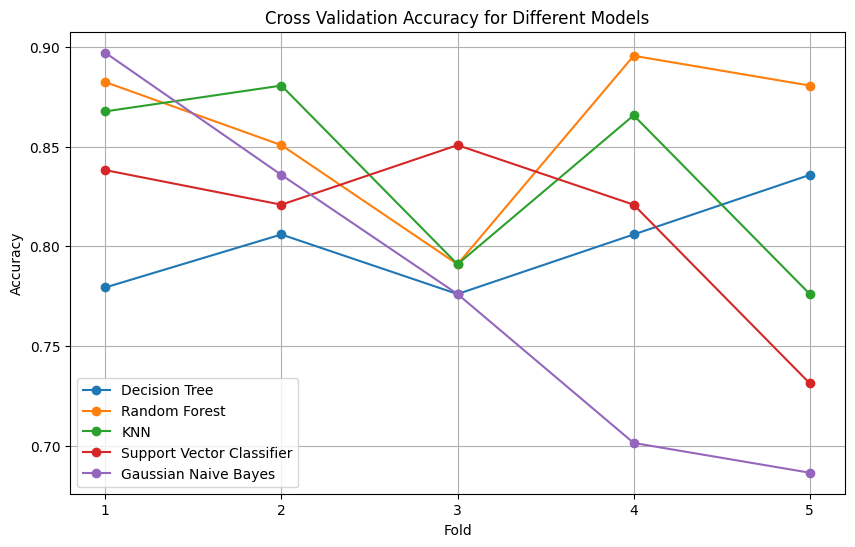

In [26]:
# Plot cross-validation results
plt.figure(figsize=(10, 6))
for name, scores in cv_results.items():
    plt.plot(range(1, num_folds + 1), scores, marker='o', label=name)
# Print cross-validation results
for name, scores in cv_results.items():
    print(f"{name}: Mean Accuracy = {np.mean(scores):.2f}, Std Dev = {np.std(scores):.2f}")

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Accuracy for Different Models')
plt.xticks(np.arange(1, num_folds + 1))
plt.legend()
plt.grid(True)
plt.show()

# Dilakukan Perlakuan Handling Imbalance Data

Dilakukan Metode Oversampling sebagai pembanding dari hasil sebelumnya

In [27]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
# Inisialisasi RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Melakukan oversampling menggunakan RandomOverSampler
X_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Memeriksa distribusi kelas setelah random oversampling
print("Setelah Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Setelah Random Oversampling:
label
cp     111
imU    111
pp     111
im     111
om     111
imS    111
omL    111
imL    111
Name: count, dtype: int64


C:\Users\-MSI-\AppData\Local\Temp\ipykernel_16192\3194408284.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='Set2', ax=axes[0])
C:\Users\-MSI-\AppData\Local\Temp\ipykernel_16192\3194408284.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.unique(y_train), y=label_count.values, palette='Set2')


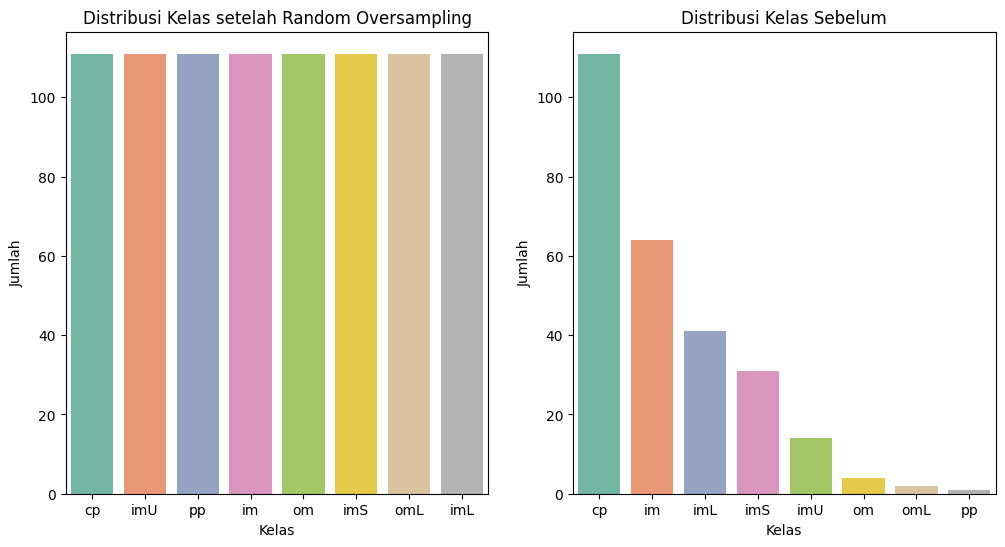

In [29]:
# Membuat DataFrame dari hasil resampling
resampled_data = pd.DataFrame({'Class': y_resampled})

# Membuat dua subplot secara bersampingan
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot pertama dengan Seaborn (Histogram distribusi kelas setelah resampling)
sns.countplot(x=y_resampled, palette='Set2', ax=axes[0])
axes[0].set_title('Distribusi Kelas setelah Random Oversampling')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah')

# Plot kedua dengan Seaborn (Grafik 2)
sns.barplot(x=np.unique(y_train), y=label_count.values, palette='Set2')
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah')
axes[1].set_title('Distribusi Kelas Sebelum')

plt.show()

C:\Users\-MSI-\AppData\Local\Temp\ipykernel_16192\1299864709.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=accuracies_ros.keys(), y=accuracies_ros.values(), palette='tab20')# Gunakan 'viridis' colormap


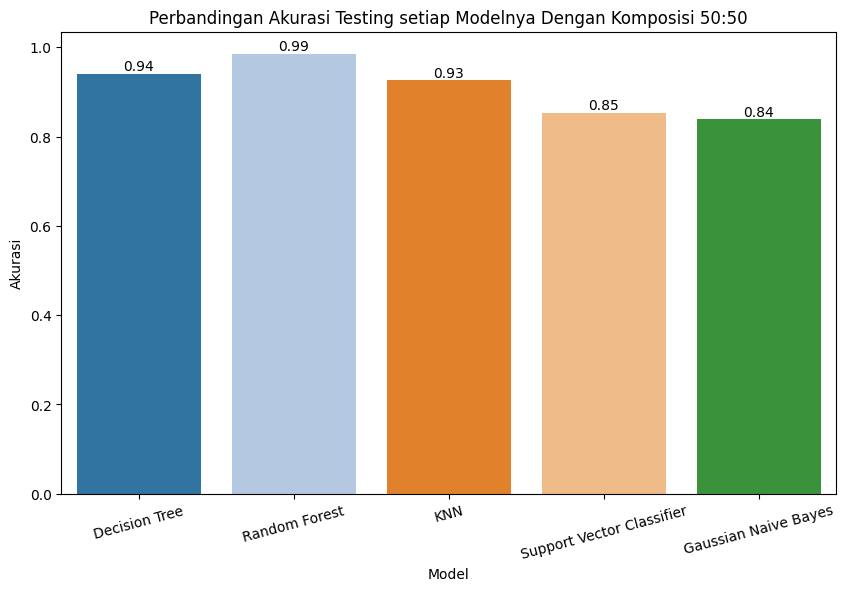

In [127]:
# Inisialisasi model
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier' : SVC(kernel='linear',probability=True),
    'Gaussian Naive Bayes' : GaussianNB()
}

# Pelatihan dan evaluasi model
accuracies_ros = {}
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_ros[name] = accuracy
    
# Membuat barplot dengan menggunakan colormap
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=accuracies_ros.keys(), y=accuracies_ros.values(), palette='tab20')# Gunakan 'viridis' colormap
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Testing setiap Modelnya Dengan Komposisi 50:50')
plt.xticks(rotation=15)
# Menambahkan teks di atas setiap bar
for bar, accuracy in zip(bars.patches, accuracies_ros.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}', 
             ha='center', va='bottom')
plt.show()

Setelah itu bisa dilakukan percobaan menggunakan Metode Ensamble Learning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

In [131]:
# Inisialisasi model-model dasar
base_models = [
    ('Decision Tree',DecisionTreeClassifier()),
    ('Random Forest',RandomForestClassifier(n_estimators=100,random_state=42)),
    ('KNN',KNeighborsClassifier(n_neighbors=5)),
    ('Support Vector Classifier',  SVC(kernel='linear',probability=True)),
    ('Gaussian Naive Bayes' , GaussianNB())
]

# Inisialisasi model meta learner
meta_model = LogisticRegression()

# Membuat Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Melatih model Stacking
stacking_model.fit(X_resampled, y_resampled)

# Memprediksi menggunakan model Stacking
y_pred_stacking = stacking_model.predict(x_test)

# Menghitung akurasi
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Accuracy of Stacking Classifier:", accuracy_stacking)

Accuracy of Stacking Classifier: 0.9705882352941176
